In [ ]:
!wget https://raw.githubusercontent.com/kashamcrash/CancerDataset/main/cancertype.csv

--2023-06-22 13:54:13--  https://raw.githubusercontent.com/kashamcrash/CancerDataset/main/cancertype.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/plain]
Saving to: ‘cancertype.csv’

cancertype.csv      100%[===================>] 122.27K  --.-KB/s    in 0.02s   

2023-06-22 13:54:14 (5.38 MB/s) - ‘cancertype.csv’ saved [125204/125204]



In [ ]:
import pandas as pd

In [ ]:
cancer = pd.read_csv('/content/cancertype.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer = cancer.drop(['id', 'Unnamed: 32'], axis=1)
columns = cancer.columns

In [ ]:
cancer['radius_mean'].dtype

dtype('float64')

In [ ]:
def extract_normalize_and_onehot_features(dataset:pd.DataFrame):
  '''
  Description:
  This function takes a pandas DataFrame as a parameter and returns a tuple of list.
  The first list contains columns which are needed to normalized while second one
  contains the features which are needed to be one hot encoded.
  Example:
    normalize, onehot = extract_normalize_and_onehot_feature(dataframe_name)
  Returns:
    Tuple containing normalize features and one hot features separate list
  '''
  normalize_features = []
  onehot_features = []
  columns = dataset.columns
  for column in columns:
    if dataset[column].dtype != 'O' and float(dataset[column].max())  > 1:
      normalize_features.append(column)
    if dataset[column].dtype == 'O':
      onehot_features.append(column)
  return normalize_features, onehot_features

In [ ]:
normalize, onehot = extract_normalize_and_onehot_features(cancer)

In [ ]:
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
labels = cancer['diagnosis']
labels.unique()
labels

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [ ]:
features = cancer.drop(['diagnosis'], axis=1)

In [ ]:
labels = [0 if i == 'M' else 1 for i in labels]
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,


In [ ]:
features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
ct = make_column_transformer(
    (MinMaxScaler(), normalize)
)
ct.fit(X_train)
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
y_train = tf.cast(y_train, dtype=tf.float32)
y_test = tf.cast(y_test, dtype=tf.float32)

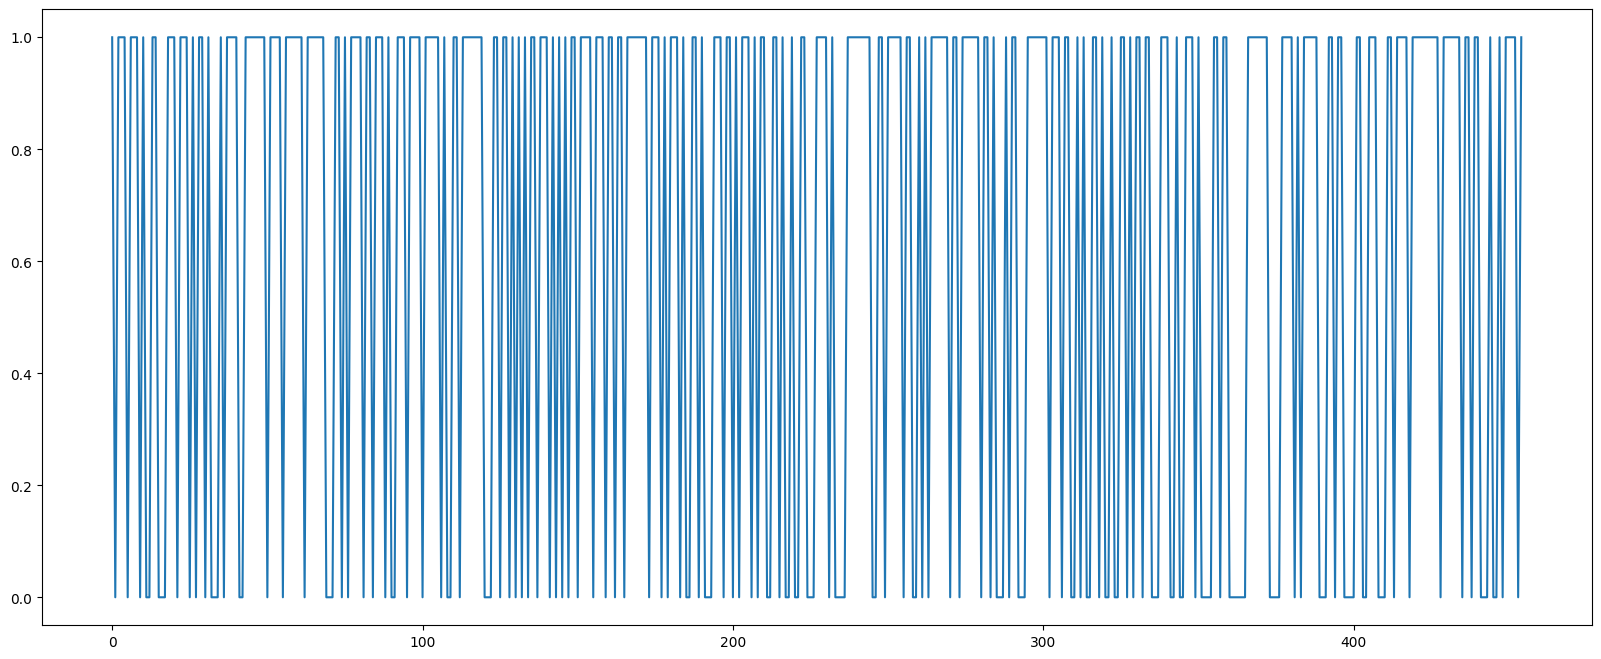

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(y_train)

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(1, 'sigmoid')
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history_1 = model_1.fit(X_train,
                            y_train,
                            epochs=100,
                            callbacks=[lr_callback])

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 15.5568 - accuracy: 0.6308 - lr: 1.0000e-04
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 4.2932 - accuracy: 0.7231 - lr: 1.1220e-04
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1.3488 - accuracy: 0.6725 - lr: 1.2589e-04
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.8848 - accuracy: 0.7802 - lr: 1.4125e-04
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.8306 - accuracy: 0.8681 - lr: 1.5849e-04
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7476 - accuracy: 0.8374 - lr: 1.7783e-04
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.8527 - lr: 1.9953e-04
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.8571 - lr: 2.2387e-04
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss

In [ ]:
def plot_history_curves(history):
  # plot loss with learning rate
  plt.subplots(ncols=2, figsize=(6, 2))
  lr = history['lr']
  loss = history['loss']
  accuracy = history['accuracy']
  plt.subplot(1,2,1)
  plt.xlabel("learning_rate")
  plt.ylabel("loss")
  plt.semilogx(lr, loss)
  # plot accuracy with learning rate
  plt.subplot(1,2,2)
  plt.xlabel("learning_rate")
  plt.ylabel("accuracy")
  plt.semilogx(lr, accuracy)

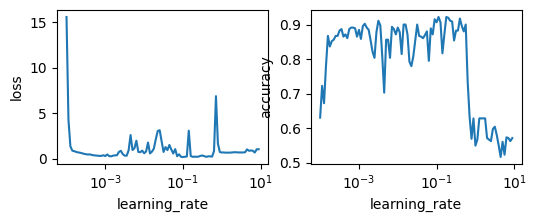

In [ ]:
plot_history_curves(history_1.history)

In [ ]:
# 0.08 looks like best learning rate for our model so we'll create same model but we'll provide lr this time.

In [ ]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(1, 'sigmoid')
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.08),
                metrics=['accuracy'])


history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=100,)

Epoch 1/100
15/15 [==============================] - 3s 8ms/step - loss: 138.4976 - accuracy: 0.4989
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.6286
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.6286
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.6286
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6599 - accuracy: 0.6286
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6602 - accuracy: 0.6286
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6601 - accuracy: 0.6286
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.6286
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.6286
Epoch 10/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6604 - accuracy: 0.6286
Epoch 1

In [ ]:
# So we get an accuracy of 91% which is not bad but we'll try to improve this accuracy

In [ ]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(256, 'relu'),
    tf.keras.layers.Dense(1, 'sigmoid')
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history_3 = model_3.fit(X_train,
                            y_train,
                            epochs=100,
                            callbacks=[lr_callback])

Epoch 1/100
15/15 [==============================] - 3s 5ms/step - loss: 26.1894 - accuracy: 0.3758 - lr: 1.0000e-04
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 5.0674 - accuracy: 0.7275 - lr: 1.1220e-04
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.7301 - accuracy: 0.6549 - lr: 1.2589e-04
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8640 - accuracy: 0.8308 - lr: 1.4125e-04
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5815 - accuracy: 0.8813 - lr: 1.5849e-04
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4615 - accuracy: 0.8747 - lr: 1.7783e-04
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5144 - accuracy: 0.8835 - lr: 1.9953e-04
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3880 - accuracy: 0.8989 - lr: 2.2387e-04
Epoch 9/100
15/15 [==============================] - 0s 7ms/step - loss

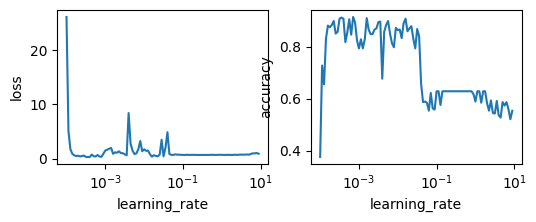

In [ ]:
plot_history_curves(history_3.history)

In [ ]:
import numpy as np

history_3.history['lr'][np.argmax(history_3.history['accuracy'])]

0.0007079458

In [ ]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(256, 'relu'),
    tf.keras.layers.Dense(1, 'sigmoid')
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0007079458),
                metrics=['accuracy'])


history_4 = model_4.fit(X_train_norm,
                            y_train,
                            epochs=300,)

Epoch 1/300
15/15 [==============================] - 1s 2ms/step - loss: 0.6763 - accuracy: 0.7341
Epoch 2/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6049 - accuracy: 0.8220
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.8462
Epoch 4/300
15/15 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.8549
Epoch 5/300
15/15 [==============================] - 0s 3ms/step - loss: 0.3226 - accuracy: 0.8879
Epoch 6/300
15/15 [==============================] - 0s 3ms/step - loss: 0.2619 - accuracy: 0.9099
Epoch 7/300
15/15 [==============================] - 0s 3ms/step - loss: 0.2216 - accuracy: 0.9297
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9275
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 0.1629 - accuracy: 0.9560
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1509 - accuracy: 0.9495
Epoch 11/

In [ ]:
# we have achieved an accuracy of 98% which is great now let's evaluate model 4

In [ ]:
model_4.evaluate(X_test_norm, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2854 - accuracy: 0.9386


[0.28538140654563904, 0.9385964870452881]

In [ ]:
# Woah! we have 93% accuracy on unseen data. That's great.

In [ ]:
preds = model_4.predict(X_test_norm)

4/4 [==============================] - 0s 4ms/step


In [ ]:
preds = np.ravel(np.around(preds))

In [ ]:
preds

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(114,), dtype=float32, numpy=
array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.], dtype=float32)>

In [ ]:
np.count_nonzero(preds-y_test)

6

In [ ]:
# This is the accuracy of our model -> 97.3%

In [ ]:
res = np.ravel(np.around(model_4.predict(np.array([X_train_norm[6]]))))
y_train[6] == res

1/1 [==============================] - 0s 57ms/step


<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

In [1]:
# Exercise: Create a model with 99% accuracy